## SMS Classifier
### Import the required packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

### Reading the dataset

In [18]:
df=pd.read_csv('combined_data.csv')

### Displaying the top rows of dataset

In [19]:
df.head(10)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...


### Display the shape of dataset

In [20]:
df.shape

(83448, 2)

### Displaying the datatypes of dataset

In [21]:
df.dtypes

label     int64
text     object
dtype: object

### View the info of the data frame that contains all details.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


### Checking for null values

In [23]:
df.isnull().sum()

label    0
text     0
dtype: int64

### Display the column with respect to another column

In [24]:
df['text'][1]

"wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumber"

In [25]:
df['text'][0]

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

### Count of the unique value in a particular column

In [26]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

### Data Visualization

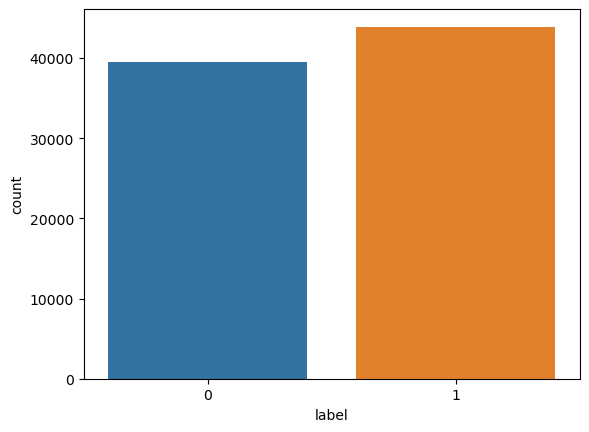

In [27]:
sns.countplot(x='label',data=df)
plt.show()

## Creating the model.
### Fitting the Model and splitting the data into train and test datasets.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 83448
Number of rows in the training set: 62586
Number of rows in the test set: 20862


In [30]:
count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [31]:
model=LogisticRegression()

In [32]:
model.fit(training_data, y_train)

LogisticRegression()

In [33]:
model.score(training_data, y_train)

0.9925862013868917

In [34]:
model.score(testing_data,y_test)

0.9826478765219059

In [35]:
predictions=model.predict(testing_data)

In [36]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

In [37]:
accuracy_score(y_test,predictions)

0.9826478765219059

<Axes: >

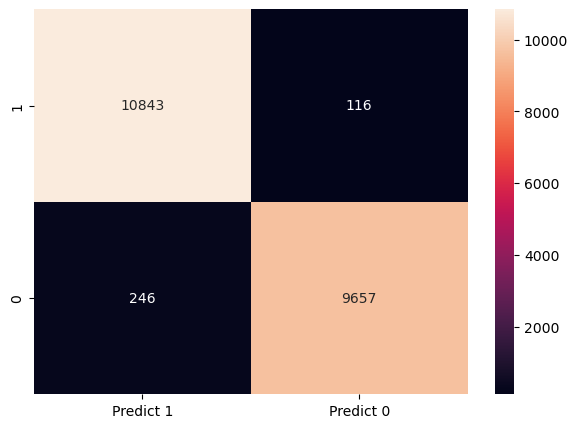

In [38]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9903
           1       0.98      0.99      0.98     10959

    accuracy                           0.98     20862
   macro avg       0.98      0.98      0.98     20862
weighted avg       0.98      0.98      0.98     20862



### Conclusion

In [40]:
accuracy=accuracy_score(y_test,predictions)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 98.26


In [44]:
print(predictions)
for prediction in predictions:
    if prediction == 1:
        print('Non-spam')
    else:
        print('Spam')

[0 0 1 ... 0 1 1]
Spam
Spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Spam
Spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Non-spam
Spam
Non-spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Non-spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Spam
Spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Spam
Spam
Spam
Spam
Non-spam
Spam
Non-spam
Non-spam
Spam
Spam
Non-spam
Non-spam
Non-spam
Spam
Non-spam
Spam
Non-spam
Non-spa